In [4]:
import numpy as np
import pandas as pd

import scanpy as sc
import anndata


from importlib import reload
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import matplotlib.pyplot as plt
import seaborn as sns




ModuleNotFoundError: No module named 'numpy'

# 6A - SEACells summarize COVID-19 study

UMAPs of healthy and critical patients

In [ ]:
sc_ad = sc.read('data/covid_singlecells.h5ad')
sc_ad = sc_ad[:, sc_ad.var_names[sc_ad.var['feature_types']=='Gene Expression']]
sc_ad.obs = sc_ad.obs.rename(columns={'initial_clustering':'celltype', 'sample_id':'sample'})

In [88]:
healthy_samples = sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary'] == 'Healthy']['sample'].unique()
healthy_samples


['MH8919179', 'MH8919227', 'MH8919226', 'MH8919178', 'newcastle65', ..., 'MH8919176', 'MH8919177', 'BGCV12_CV0926', 'BGCV08_CV0915', 'BGCV05_CV0929']
Length: 23
Categories (40, object): ['AP2', 'AP12', 'BGCV01_CV0902', 'BGCV01_CV0904', ..., 'newcastle21', 'newcastle21v2', 'newcastle65', 'newcastle74']

In [89]:
healthy = sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary'] == 'Healthy']
healthy.groupby('sample').count().loc[healthy_samples, ['total_counts']]

,total_counts
sample,
MH8919179,4316
MH8919227,2096
MH8919226,1190
MH8919178,7016
newcastle65,5655
MH8919282,6896
MH8919283,7100
BGCV10_CV0939,1719
BGCV09_CV0917,2924


In [91]:
colors = {'B_cell': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
         'CD14': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
         'CD16': (1.0, 0.4980392156862745, 0.054901960784313725),
         'CD4': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
         'CD8': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
         'DCs': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
         'HSC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
         'Lymph_prolif': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
         'MAIT': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
         'Mono_prolif': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
         'Plasmablast': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
         'Platelets': (1.0, 0.596078431372549, 0.5882352941176471),
         'RBC': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
         'Treg': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
         'gdT': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
         'pDC': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
         'Mixed': 'cornsilk',
         'NK': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)}

/Users/sitarapersad/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


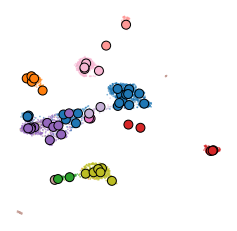

In [93]:
for sample in sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary'] == 'Healthy']['sample'].unique():
    # Compute UMAP for this sample
    tmp_ad = sc_ad[sc_ad.obs['sample']==sample].copy()
    
    tmp_ad.X = tmp_ad.layers['raw'].copy()

    sc.pp.normalize_total(tmp_ad)
    sc.pp.log1p(tmp_ad)
    sc.pp.highly_variable_genes(tmp_ad, batch_key='sample', n_top_genes=2500, inplace=True)

    tmp_ad = tmp_ad[:, tmp_ad.var_names[tmp_ad.var['highly_variable']]]
    sc.tl.pca(tmp_ad)
    sc.pp.neighbors(tmp_ad, use_rep='X_pca')
    sc.tl.umap(tmp_ad)

    plt.figure(figsize=(4,4))
    plt.scatter(tmp_ad.obsm['X_umap'][:,0], 
                tmp_ad.obsm['X_umap'][:,1], 
                color=[colors[i] for i in tmp_ad.obs['celltype']],
                s=0.5,
               alpha=0.5)

    df = pd.DataFrame(tmp_ad.obsm['X_umap']).set_index(tmp_ad.obs_names).join(tmp_ad.obs['SEACell']).groupby('SEACell').mean()
    df = df.join(tmp_ad.obs[['SEACell','celltype']].groupby('SEACell').agg(lambda x:x.value_counts().index[0])
                )
    plt.scatter(df[0], df[1], 
                s=80, 
                color=[colors[i] for i in df['celltype']], 
                linewidth=1,
                edgecolor='black', alpha=1)
    
    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    plt.close()
    

/Users/sitarapersad/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


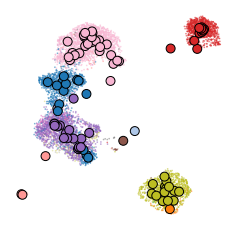

In [94]:
for sample in sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary'] == 'Critical']['sample'].unique():
    # Compute UMAP for this sample
    tmp_ad = sc_ad[sc_ad.obs['sample']==sample].copy()
    
    tmp_ad.X = tmp_ad.layers['raw'].copy()

    sc.pp.normalize_total(tmp_ad)
    sc.pp.log1p(tmp_ad)
    sc.pp.highly_variable_genes(tmp_ad, batch_key='sample', n_top_genes=2500, inplace=True)

    tmp_ad = tmp_ad[:, tmp_ad.var_names[tmp_ad.var['highly_variable']]]
    sc.tl.pca(tmp_ad)
    sc.pp.neighbors(tmp_ad, use_rep='X_pca')
    sc.tl.umap(tmp_ad)

    plt.figure(figsize=(4,4))
    plt.scatter(tmp_ad.obsm['X_umap'][:,0], 
                tmp_ad.obsm['X_umap'][:,1], 
                color=[colors[i] for i in tmp_ad.obs['celltype']],
                s=0.5,
               alpha=0.5)

    df = pd.DataFrame(tmp_ad.obsm['X_umap']).set_index(tmp_ad.obs_names).join(tmp_ad.obs['SEACell']).groupby('SEACell').mean()
    df = df.join(tmp_ad.obs[['SEACell','celltype']].groupby('SEACell').agg(lambda x:x.value_counts().index[0])
                )
    plt.scatter(df[0], df[1], 
                s=80, 
                color=[colors[i] for i in df['celltype']], 
                linewidth=1,
                edgecolor='black', alpha=1)
    
    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    plt.close()
    

# 6B - SEACells enables efficient integration of large-scale single-cell datasets
SEACell UMAPs- Coloured by celltype, patient sample and disease status

In [168]:
mc_ad = sc.read('data/covid_metacells.h5ad')

In [169]:
mc_ad.obs.head()

,sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,celltype,Resample,Collection_Day,...,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,n_counts,Metacell_Size,Metacell,Metacell_Entropy
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGGCCT-MH8919333,MH8919333,1209,1209,2637.0,48.0,1.820250,CD14_mono,CD14,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919333,4093.0,1,ACATCAGCAAGCGCTC-newcastle004v2,1.048740
AAACCTGAGACAGAGA-MH8919332,MH8919332,819,819,1797.0,63.0,3.505843,CD8.TE,CD8,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919332,3796.0,1,AAACCTGAGACAGAGA-MH8919332,0.000000
AAACCTGAGACTTTCG-newcastle74,newcastle74,968,968,2214.0,99.0,4.471545,CD8.EM,CD8,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,newcastle74,6291.0,2,AAACCTGAGACAGAGA-MH8919332,0.640808
AAACCTGAGAGACTTA-MH8919283,MH8919283,842,842,2212.0,187.0,8.453888,B_immature,B_cell,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919283,17562.0,3,AAACCTGAGATGCCAG-MH9143277,0.083965
AAACCTGAGCCCAGCT-MH8919178,MH8919178,2017,2017,6319.0,233.0,3.687292,CD14_mono,CD14,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919178,166548.0,11,TGCCCTAGTCATACTG-MH8919282,1.381535


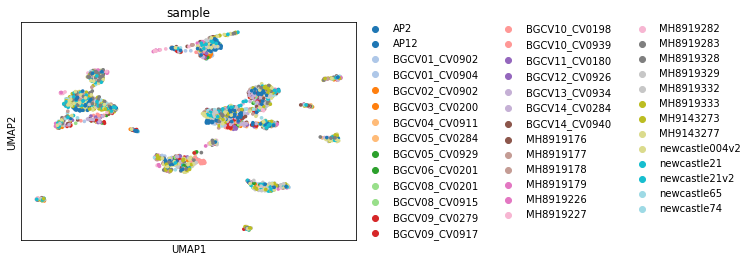

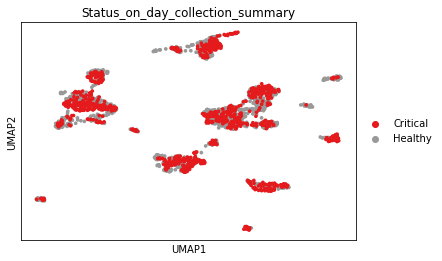

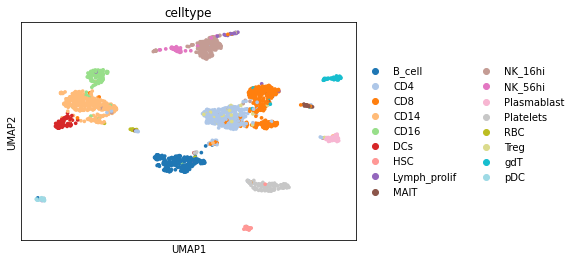

In [172]:
sc.pl.umap(mc_ad, color='sample', palette='tab20')
sc.pl.umap(mc_ad, color='Status_on_day_collection_summary', palette='Set1')
sc.pl.umap(mc_ad, color='celltype', palette='tab20')

# 6C - COVID-19 Sampled Enrichment in Aggregated Metacells

In [173]:
mmc_ad = sc.read('data/covid_metametacells_annotated.h5ad')
pvals = pd.read_csv('data/COVID_enrichment_pvals.csv', index_col=[0])

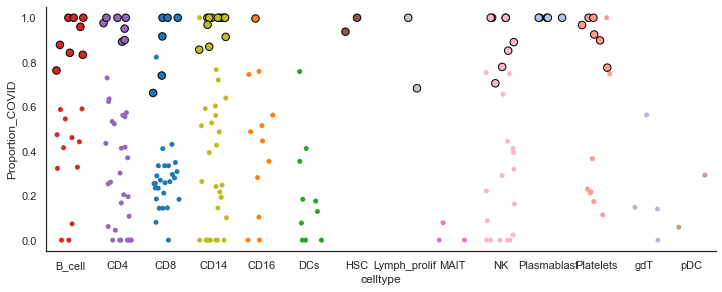

In [198]:
colors = {'B_cell': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
         'CD14': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
         'CD16': (1.0, 0.4980392156862745, 0.054901960784313725),
         'CD4': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
         'CD8': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
         'DCs': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
         'HSC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
         'Lymph_prolif': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
         'MAIT': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
         'Mono_prolif': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
         'Plasmablast': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
         'Platelets': (1.0, 0.596078431372549, 0.5882352941176471),
         'RBC': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
         'Treg': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
         'gdT': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
         'pDC': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
         'Mixed': 'cornsilk',
         'NK': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)}

sns.color_palette(colors.values())

fig_size=1.5
fig = plt.figure(figsize=(8*fig_size,3*fig_size))
df = mmc_ad.obs
df['pvalue'] = pvals.loc[df.index]
df['sig_size'] = 5
df.loc[df['pvalue']<0.1, 'sig_size'] = 10

df['Proportion_COVID'] = 1 - df['Proportion_Healthy']
sns.stripplot(data=df[df['pvalue']>0.1], x='celltype', y='Proportion_COVID', 
                     hue='celltype', 
                     palette=colors, 
                     s = 5,
                     jitter=0.3)

sns.stripplot(data=df[df['pvalue']<=0.1], x='celltype', y='Proportion_COVID', 
                     hue='celltype', 
                     palette=colors, 
                     s = 7.5,
                     jitter=0.3,
             edgecolor='black', linewidth=1)

ax = plt.gca()
ax.legend_.remove()

sns.despine()

plt.savefig('COVID_stripplot_no_legend.png', dpi=200, transparent=True)

In [199]:
# Healthy to COVID Percentage change
healthy = sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary']=='Healthy']
healthy = healthy.groupby('celltype').count().iloc[:,0]
healthy.head()

celltype
B_cell     7479
CD4       28063
CD8       18705
CD14      10283
CD16       3460
Name: sample, dtype: int64

In [200]:
critical = sc_ad.obs[sc_ad.obs['Status_on_day_collection_summary']=='Critical']
critical = critical.groupby('celltype').count().iloc[:,0]
critical.head()

celltype
B_cell    11563
CD4       18342
CD8       10764
CD14      14222
CD16       2926
Name: sample, dtype: int64

In [201]:
healthy /= healthy.sum()
critical /= critical.sum()

In [202]:
percent_change = (critical-healthy)/healthy

In [203]:
percent_change = pd.DataFrame(percent_change).reset_index()
percent_change.head()

,celltype,sample
0,B_cell,0.843811
1,CD4,-0.220525
2,CD8,-0.313714
3,CD14,0.649416
4,CD16,0.008527


In [204]:
percent_change = percent_change[~percent_change['celltype'].isin(['Mono_prolif','Treg','RBC'])]
percent_change['celltype'] = percent_change['celltype'].astype(str)

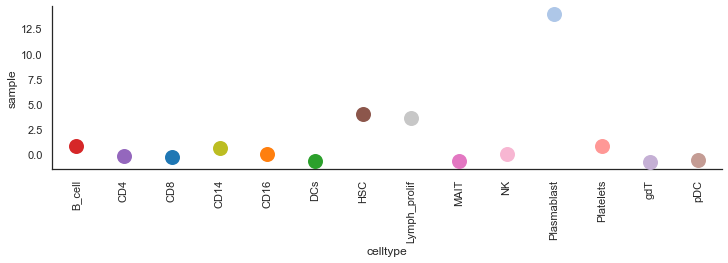

In [210]:
sns.set(style='white')

plt.figure(figsize=(12,3))
sns.swarmplot(y="sample", x="celltype", data=percent_change, palette=colors,s=15,marker='o')
# plt.ylim(-10,20)
plt.xticks(rotation=90)
sns.despine()
plt.show()
plt.close()



# 6D - Gene Expression in CD4 T-cell COVID-19 Metacells

## (i) Aggregated Metacells in CD4 T-Cells

In [175]:
colors = {}
for x in mc_ad.obs['celltype'].unique():
    if x != 'CD4':
        colors[x] = 'lightgrey'
    else:
        colors[x] = (0.5803921568627451, 0.403921568627451, 0.7411764705882353)

/Users/sitarapersad/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/sitarapersad/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


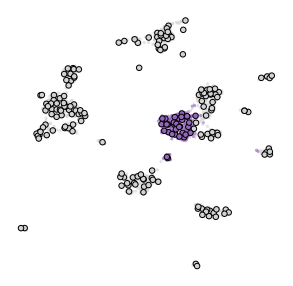

In [176]:
# Show the position of CD4 cells ONLY along with SEACell average position 
tmp_ad = mc_ad

plt.figure(figsize=(5,5))
ax = plt.gca()

ax.scatter(tmp_ad.obsm['X_umap'][:,0], 
           tmp_ad.obsm['X_umap'][:,1], 
           color=[colors[i] for i in tmp_ad.obs['celltype']],
           s=5,
           alpha=0.5)

df = pd.DataFrame(tmp_ad.obsm['X_umap']).set_index(tmp_ad.obs_names).join(tmp_ad.obs['Metacell']).groupby('Metacell').mean()
df = df.join(tmp_ad.obs[['Metacell','celltype']].groupby('Metacell').agg(lambda x:x.value_counts().index[0])
            )
df = df.loc[mmc_ad.obs_names]

df['color'] = 'black'
df['size'] = 30

ax.scatter(df[0], df[1], 
            s=df['size'], 
            color=[colors[i] for i in df['celltype']], 
            linewidth=1,
            edgecolor=df['color'].values, alpha=1)


ax.set_axis_off()

In [177]:
cd4_ad = mmc_ad[mmc_ad.obs_names[mmc_ad.obs['celltype']=='CD4']]

In [178]:
df = pd.DataFrame(tmp_ad.obsm['X_umap']).set_index(tmp_ad.obs_names).join(tmp_ad.obs['Metacell']).groupby('Metacell').mean()
df = df.join(tmp_ad.obs[['Metacell','celltype']].groupby('Metacell').agg(lambda x:x.value_counts().index[0]))

#Zoom into CD4s
cd4_umap = df[df['celltype']=='CD4'].drop('celltype', axis=1)
cd4_umap = cd4_umap[cd4_umap[0]>3]
cd4_umap = cd4_umap[cd4_umap[1]>-4]

In [179]:
genes_to_display = {'GGGCACTTCTTAGCCC-MH9143273':[['CCR10','FOXP3','IL2RA','TRBV4-1'],['red']],
                    'CGTCCATGTACTTCTT-MH8919329':[['IRF9', 'SOCS2','ISG15','IRF7','IFNAR2','NFKBIZ','CCR7','IFITM1'],['blue']],
                    'S12_GCGCAGTAGGACCACA-1':[['GZMK','RORC','CCR2','CCR6','HOPX','KLRG1','KLRB1','AB_CD2','TRAV1-2','IL7R'],['yellow']],
                   }

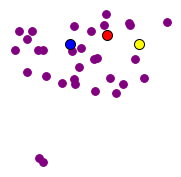

In [180]:
# cd4_umap['Average_Days_From_Onset'] = cd4_ad.obs.loc[cd4_umap.index, 'Average_Days_From_Onset']
fig = plt.figure(figsize=(3,3))
plt.scatter(cd4_umap[0], cd4_umap[1], s=60, color='purple')

for mc in genes_to_display.keys():
    plt.scatter(cd4_umap.loc[mc,0], cd4_umap.loc[mc,1], s=100, color=genes_to_display[mc][1], edgecolor='black',linewidth=1)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

sns.despine(fig=fig, ax=ax, top=True, right=True, left=True, bottom=True, offset=None)

## (ii) Average Time Since Disease Onset

In [181]:
import matplotlib.cm as cm
import matplotlib as matplotlib

def color_map_color(value, cmap_name='Greens', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:,:3]  # will return rgba, we take only first 3 so we get rgb
    color = [matplotlib.colors.rgb2hex(x) for x in rgb]
    return color

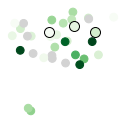

In [182]:
cd4_umap['Average_Days_From_Onset'] = cd4_ad.obs.loc[cd4_umap.index, 'Average_Days_From_Onset']
cd4_umap['color'] = color_map_color(cd4_umap['Average_Days_From_Onset'], 
                                   'Greens',
                                    cd4_umap['Average_Days_From_Onset'].min(),
                                    cd4_umap['Average_Days_From_Onset'].max()
                                   )

cd4_umap.loc[cd4_umap['Average_Days_From_Onset'].isna(), 'color'] = 'lightgrey'
# Color by time since disease onset
fig=plt.figure(figsize=(2,2))
plt.scatter(x=cd4_umap[0], y=cd4_umap[1], s=60, color=cd4_umap['color'])


for mc in genes_to_display.keys():
    plt.scatter(x=cd4_umap.loc[mc,0], y=cd4_umap.loc[mc,1], s=100, color=cd4_umap.loc[mc,'color'], edgecolor='black', linewidth=1)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

sns.despine(fig=fig, ax=ax, top=True, right=True, left=True, bottom=True, offset=None)
plt.savefig('CD4_time_onset.png', dpi=200, transparent=True)

## (iii) Proportion Cells from COVID-19 Samples

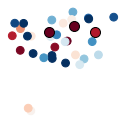

In [183]:
cd4_umap['Proportion_Healthy'] = cd4_ad.obs.loc[cd4_umap.index, 'Proportion_Healthy']

cd4_umap['color'] = color_map_color(cd4_umap['Proportion_Healthy'], 
                                   'RdBu',
                                    0,
                                    1
                                   )

# Color by time since disease onset
fig=plt.figure(figsize=(2,2))
plt.scatter(x=cd4_umap[0], y=cd4_umap[1], s=60, color=cd4_umap['color'])


for mc in genes_to_display.keys():
    plt.scatter(x=cd4_umap.loc[mc,0], y=cd4_umap.loc[mc,1], s=100, color=cd4_umap.loc[mc,'color'], edgecolor='black', linewidth=1)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

sns.despine(fig=fig, ax=ax, top=True, right=True, left=True, bottom=True, offset=None)
plt.savefig('CD4_proportions.png', dpi=200, transparent=True)

## (iv) Gene Expression Programs in Aggregated Metacells

In [184]:
sc.pp.scale(cd4_ad)
genes = [x[0] for x in genes_to_display.values()]
genes = sum(list(genes), [])
expression = cd4_ad[:,genes].to_df()
expression = expression.T
expression.head()


/Users/sitarapersad/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Metacell,BGCV01_CGTTCTGCAAGCGTAG-1,ACCGTAAGTGTCGCTG-newcastle004v2,CATTATCTCGCCGTGA-MH8919333,GACCTGGCACCCAGTG-newcastle65,BGCV09_GGGATGACACCCAGTG-1,AACTCCCGTTATGCGT-newcastle21v2,ATTACTCTCGATAGAA-MH8919333,BGCV12_TCTCTAACAGACACTT-1,AACACGTAGGTGATAT-newcastle21,CGGGTCAGTACAAGTA-MH8919328,...,BGCV08_GACCTGGGTCATGCCG-1,TCACGAATCAGTCCCT-MH8919332,CTAGTGACACGTGAGA-newcastle65,GCACATAGTCTGATCA-MH8919282,TCTTTCCCAGACGCTC-newcastle65,TAGTGGTCAGGGATTG-MH8919282,S13_CGTCTACGTCTGCCAG-1,GTGCATAAGTGGTCCC-MH8919282,S12_CTCAGAACAGGTGGAT-1,S13_GCGCCAAGTTATCCGA-1
CCR10,-1.393436,1.713817,1.548506,0.683593,-0.712356,-0.694500,0.957908,-1.297108,-0.737923,0.651361,...,-0.040836,1.587002,-0.163484,0.919563,-1.025414,-0.652482,-1.615366,-0.457330,0.893761,0.526816
FOXP3,-1.691322,1.615842,1.143533,-0.275836,-0.541147,-0.596923,0.109346,-0.065202,-1.251154,0.631056,...,0.695313,2.075171,-0.019161,0.599796,-0.762195,-0.860458,-1.304228,-0.644173,0.138878,0.309571
IL2RA,-2.211958,1.070201,0.920305,-0.257462,-0.781521,0.767870,0.799367,0.038892,0.934660,0.229481,...,-0.146203,0.827851,-0.250618,0.619685,-0.633250,-1.443249,-0.283516,-0.482722,1.148509,-0.330059
TRBV4-1,-2.938561,-0.228095,1.424914,1.103142,-1.350986,-0.457205,0.854283,-1.129681,0.693367,0.029957,...,-0.353402,0.724978,-0.006868,0.688183,-0.309515,0.541873,0.745659,0.192487,0.223372,-1.577356
IRF9,-1.931194,0.920035,1.070827,0.950022,-1.574294,0.825175,0.982986,-1.129664,0.672472,0.676816,...,-0.951911,0.588360,0.238607,0.643776,0.053540,0.813706,-0.678811,0.531306,-0.478853,-0.300133


In [185]:
expression['Associated_With'] = sum([genes_to_display[mc][1]*len(genes_to_display[mc][0]) for mc in genes_to_display], [])
expression['Associated_With'] = pd.Categorical(expression['Associated_With'], categories = ['blue', 'red', 'yellow'])
expression.sort_values(by='Associated_With').head()

Metacell,BGCV01_CGTTCTGCAAGCGTAG-1,ACCGTAAGTGTCGCTG-newcastle004v2,CATTATCTCGCCGTGA-MH8919333,GACCTGGCACCCAGTG-newcastle65,BGCV09_GGGATGACACCCAGTG-1,AACTCCCGTTATGCGT-newcastle21v2,ATTACTCTCGATAGAA-MH8919333,BGCV12_TCTCTAACAGACACTT-1,AACACGTAGGTGATAT-newcastle21,CGGGTCAGTACAAGTA-MH8919328,...,TCACGAATCAGTCCCT-MH8919332,CTAGTGACACGTGAGA-newcastle65,GCACATAGTCTGATCA-MH8919282,TCTTTCCCAGACGCTC-newcastle65,TAGTGGTCAGGGATTG-MH8919282,S13_CGTCTACGTCTGCCAG-1,GTGCATAAGTGGTCCC-MH8919282,S12_CTCAGAACAGGTGGAT-1,S13_GCGCCAAGTTATCCGA-1,Associated_With
CCR7,-2.332827,-0.026847,-0.557242,-0.438325,-0.636137,1.403243,-0.705251,0.428995,1.728607,-0.152010,...,-0.653807,0.356532,0.561665,-1.758861,1.308483,1.257754,0.030330,0.292388,0.628969,blue
IFITM1,-3.142118,0.636169,-0.002213,0.618055,-1.015015,0.483274,0.208945,-0.742786,0.850394,0.213448,...,0.978027,-0.005840,0.565874,-2.474458,0.137960,0.403957,-1.051653,0.866752,0.416069,blue
NFKBIZ,-2.489648,1.671505,-0.104780,-0.352732,-0.819579,1.639923,-0.552701,-0.983745,1.593737,-0.191516,...,0.161703,-0.283123,0.173993,-1.388225,-0.593674,0.404862,0.114707,0.271963,-0.058510,blue
IFNAR2,-1.883213,1.010851,1.181157,0.808443,-1.407769,0.937468,0.899141,-1.221230,1.081683,0.621669,...,0.457932,0.156898,0.706328,-0.190324,0.983318,-0.814986,0.605803,-1.277081,-0.482220,blue
IRF9,-1.931194,0.920035,1.070827,0.950022,-1.574294,0.825175,0.982986,-1.129664,0.672472,0.676816,...,0.588360,0.238607,0.643776,0.053540,0.813706,-0.678811,0.531306,-0.478853,-0.300133,blue


In [186]:
expression = expression.set_index('Associated_With', append=True).sort_index(level='Associated_With')

In [187]:
col_colors = [colors[x] if x in colors else 'white' for x in expression.columns]

<Figure size 360x360 with 0 Axes>

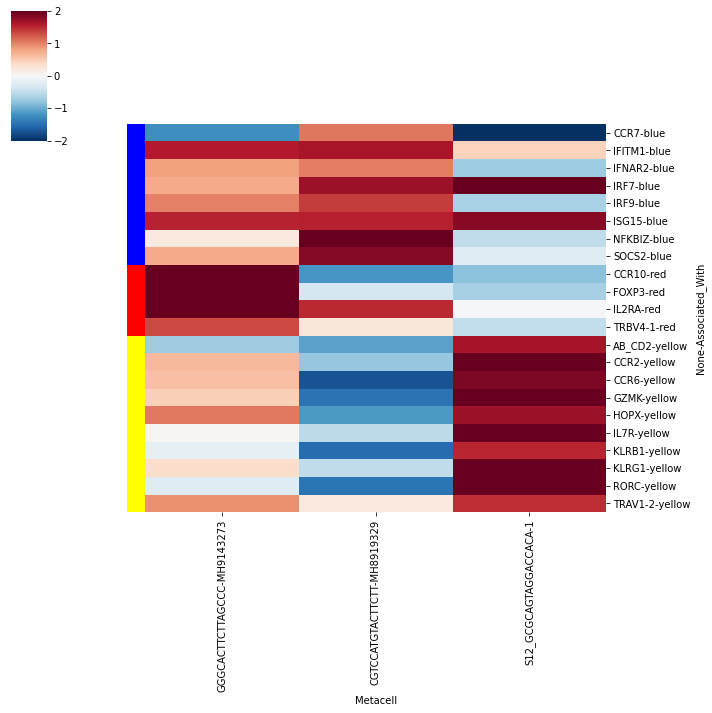

In [188]:
plt.figure(figsize=(5,5))
sns.clustermap(expression[genes_to_display.keys()], cmap='RdBu_r', vmin=-2, vmax=2, col_cluster=False, row_cluster=False, row_colors=expression.index.get_level_values('Associated_With'), col_colors=col_colors)
plt.show()
plt.close()